In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df= pd.read_csv("segmentation data.csv")
df.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
651,100000652,0,0,37,1,86967,0,0
1977,100001978,0,0,42,1,81606,0,0
1778,100001779,1,1,26,1,97856,1,0
1809,100001810,1,0,36,1,107372,0,0
127,100000128,0,0,30,0,99066,1,2


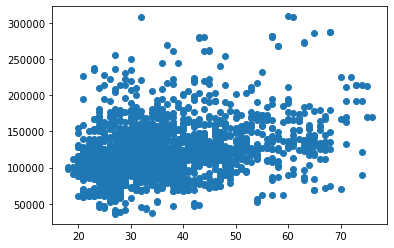

In [3]:
plt.scatter(df.Age, df.Income)

In [4]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [5]:
X= df.drop('ID', axis=1)
X

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [7]:
X = sc.fit_transform(X)
X

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [8]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

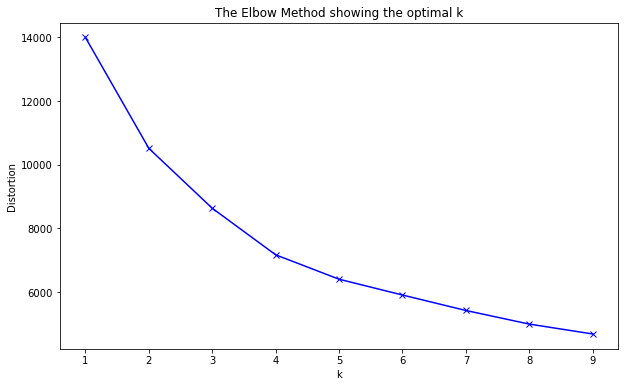

In [10]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(X)

KMeans(n_clusters=5)

In [14]:
df['k_means']=kmeanModel.predict(X)
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,k_means
0,100000001,0,0,67,2,124670,1,2,4
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,1
3,100000004,0,0,45,1,171565,1,1,3
4,100000005,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1
1996,100001997,1,1,27,1,117744,1,0,2
1997,100001998,0,0,31,0,86400,0,0,1
1998,100001999,1,1,24,1,97968,0,0,2


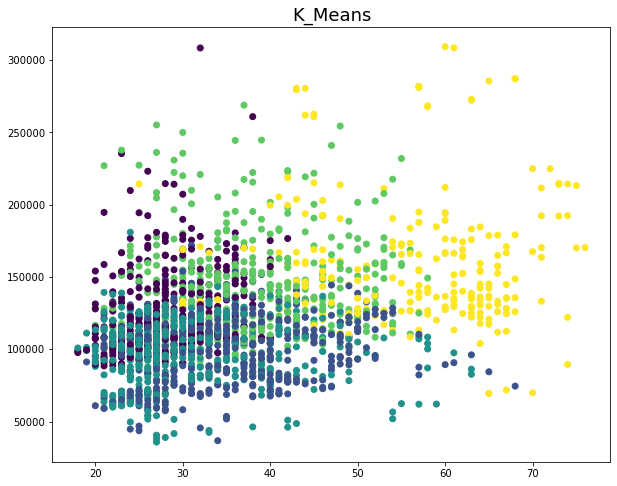

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(df.Age, df.Income, c=df['k_means'])
plt.title('K_Means', fontsize=18)
plt.show()